In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\amrut\Downloads\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.sample(3)

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
3083,6.0,0,0,0,13629,0,1,0,0,0,0,1978,5.062595,7.913332
11089,7.0,0,2,5,12305,0,1,0,0,0,0,1980,5.525453,8.125927
11385,2.0,2,5,0,14197,1,1,0,0,1,1,1907,4.234107,8.319703


In [3]:
X = data.iloc[:, :-1]
y = data[['transform_price']]
X.columns

Index(['number_of_rooms', 'floor_on', 'total_floors', 'bedroom', 'pincode',
       'balkon', 'terrasse', 'garten', 'Gaste-WC', 'Aufzug', 'wohung',
       'construction_year', 'living_area_m2'],
      dtype='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((12424, 13), (12424, 1), (319, 13))

In [5]:
tf.random.set_seed(68)
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'),
    #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1)),
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.SimpleRNN(80, return_sequences = True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(20,activation = 'relu'),
    tf.keras.layers.Dense(1)])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epochs: 1e-5 * 10**(epochs / 20))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [6]:
history=model.fit(X_train,y_train, validation_data = (X_test, y_test), 
                batch_size = 64, epochs=50, callbacks = [lr_schedule])


Epoch 1/50
195/195 [==============================] - 8s 24ms/step - loss: 54.7831 - mae: 7.3778 - val_loss: 45.2286 - val_mae: 6.7110
Epoch 2/50
195/195 [==============================] - 4s 21ms/step - loss: 38.2568 - mae: 6.1636 - val_loss: 31.1896 - val_mae: 5.5681
Epoch 3/50
195/195 [==============================] - 4s 21ms/step - loss: 25.2606 - mae: 4.9981 - val_loss: 19.1230 - val_mae: 4.3517
Epoch 4/50
195/195 [==============================] - 6s 30ms/step - loss: 13.9913 - mae: 3.6994 - val_loss: 9.1445 - val_mae: 2.9937
Epoch 5/50
195/195 [==============================] - 6s 29ms/step - loss: 5.7655 - mae: 2.3372 - val_loss: 2.9238 - val_mae: 1.6631
Epoch 6/50
195/195 [==============================] - 6s 29ms/step - loss: 1.4957 - mae: 1.1280 - val_loss: 0.5638 - val_mae: 0.6606
Epoch 7/50
195/195 [==============================] - 6s 29ms/step - loss: 0.3010 - mae: 0.4548 - val_loss: 0.2017 - val_mae: 0.3394
Epoch 8/50
195/195 [==============================] - 6s 29ms/

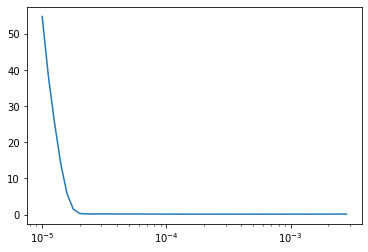

In [8]:
lrs = 1e-5 * (10 ** (np.arange(50) / 20))
plt.semilogx(lrs, history.history["loss"])

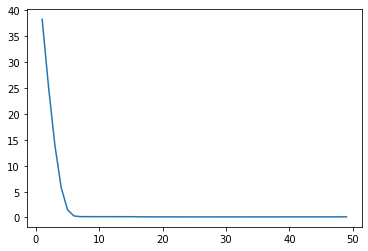

In [9]:
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])

In [10]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 12489
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[623409.7]], dtype=float32)

In [11]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 10178
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[623408.5]], dtype=float32)

In [12]:
tf.random.set_seed(0)
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'),
    #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1)),
    tf.keras.layers.LSTM(32, return_sequences = True),
    tf.keras.layers.LSTM(16),
    #tf.keras.layers.SimpleRNN(40, return_sequences = True),
    #tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1)])
model1.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5), metrics = ['mae'])
history1 = model1.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=100, batch_size = 64)

Epoch 1/100
195/195 [==============================] - 4s 11ms/step - loss: 64.1263 - mae: 7.9931 - val_loss: 56.1535 - val_mae: 7.4798
Epoch 2/100
195/195 [==============================] - 1s 8ms/step - loss: 46.8120 - mae: 6.8158 - val_loss: 36.3246 - val_mae: 6.0099
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 29.5789 - mae: 5.4098 - val_loss: 22.9003 - val_mae: 4.7627
Epoch 4/100
195/195 [==============================] - 1s 7ms/step - loss: 18.3556 - mae: 4.2504 - val_loss: 13.7275 - val_mae: 3.6743
Epoch 5/100
195/195 [==============================] - 1s 7ms/step - loss: 10.9187 - mae: 3.2644 - val_loss: 8.0427 - val_mae: 2.7946
Epoch 6/100
195/195 [==============================] - 1s 7ms/step - loss: 6.2754 - mae: 2.4529 - val_loss: 4.4282 - val_mae: 2.0500
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 3.2618 - mae: 1.7360 - val_loss: 2.1227 - val_mae: 1.3826
Epoch 8/100
195/195 [==============================] - 2s 8

Epoch 62/100
195/195 [==============================] - 2s 10ms/step - loss: 0.1080 - mae: 0.2418 - val_loss: 0.1064 - val_mae: 0.2374
Epoch 63/100
195/195 [==============================] - 2s 10ms/step - loss: 0.1077 - mae: 0.2411 - val_loss: 0.1058 - val_mae: 0.2364
Epoch 64/100
195/195 [==============================] - 2s 10ms/step - loss: 0.1075 - mae: 0.2410 - val_loss: 0.1056 - val_mae: 0.2366
Epoch 65/100
195/195 [==============================] - 2s 10ms/step - loss: 0.1072 - mae: 0.2402 - val_loss: 0.1050 - val_mae: 0.2371
Epoch 66/100
195/195 [==============================] - 2s 10ms/step - loss: 0.1070 - mae: 0.2402 - val_loss: 0.1059 - val_mae: 0.2364
Epoch 67/100
195/195 [==============================] - 2s 10ms/step - loss: 0.1069 - mae: 0.2398 - val_loss: 0.1046 - val_mae: 0.2356
Epoch 68/100
195/195 [==============================] - 2s 10ms/step - loss: 0.1066 - mae: 0.2397 - val_loss: 0.1065 - val_mae: 0.2369
Epoch 69/100
195/195 [==============================] -

In [13]:
predictions = model1.predict(X_test)
predictions[:5], y_test.to_numpy()[:5]

(array([[8.613729],
        [8.434701],
        [8.41292 ],
        [7.909132],
        [7.743613]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ]]))

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.10068402884636743, 0.23193553039138348)

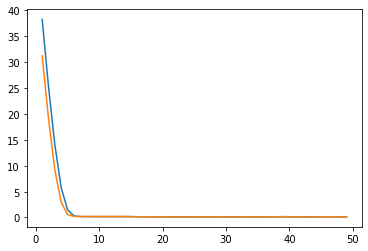

In [15]:
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])
plt.plot(range(1, len(history.history["val_loss"])), history.history["val_loss"][1:])

In [17]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model1.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 12489
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[593513.3]], dtype=float32)

In [18]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model1.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 10178
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[593513.3]], dtype=float32)

In [19]:
model.save('cnn_model1.hdf5')
model1.save('cnn_model2.hdf5')